# 🚗 Sistema de Prevenção de Colisões com Visão Computacional (YOLOv8 + D²-City)

Este projeto implementa um sistema de visão computacional capaz de **detectar objetos em tempo real** a partir de vídeos de dashcam, utilizando o modelo **YOLOv8** sobre o dataset **D²-City**. O objetivo é simular um sistema de **prevenção de colisões** similar aos utilizados por empresas como Tesla e NVIDIA.

---

## 📌 Objetivo

Criar um pipeline funcional que:
- Detecta veículos, pedestres e ciclistas em tempo real;
- Estima a distância aproximada até o objeto;
- Emite alertas quando um objeto estiver **muito próximo**, simulando risco de colisão.

---

## 📚 Índice

1. [Introdução do Projeto](#)
2. [Importação das Bibliotecas](#)
3. [Download e Visualização de Vídeo do Dataset](#)
4. [Configuração e Execução do YOLOv8](#)
5. [Lógica de Estimativa de Distância](#)
6. [Sistema de Alerta em Tempo Real](#)
7. [Conclusões e Possíveis Extensões](#)

---

## ✍️ Autor

**Lucas Coelho**  
*Cientista de Dados
📍 Baseado em Portugal  
🔗 LinkedIn / GitHub / IntelTech  

---


In [2]:
# 📚 Bibliotecas padrão
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

# 📦 Visão Computacional
import cv2

# 🧠 Modelo YOLOv8
from ultralytics import YOLO

# 💻 Google Colab / Drive
from google.colab import drive
from IPython.display import display, clear_output


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [1]:
# 🚀 Instalação de dependências
#!pip install -q ultralytics opencv-python matplotlib

# ⚙️ Verificação de GPU
print("🚀 GPU disponível:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("🔧 Usando:", torch.cuda.get_device_name(0))
else:
    print("⚠️ Usando CPU – pode ser mais lento")


🚀 GPU disponível: True
🔧 Usando: NVIDIA A100-SXM4-40GB


🔍 37 vídeos encontrados.
🎞️ Exemplos: ['004dd96b1986c657c55faaa37d7a0115.mp4', '00366f36371647fd36fddd25ac4cb8c9.mp4', '002a09f2cb4b3debd7e49587b2fe7b50.mp4', '002cb385107b51e8d3e2b3e798a78a55.mp4', '0009249f746a4d0c34301e23082151bf.mp4']


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


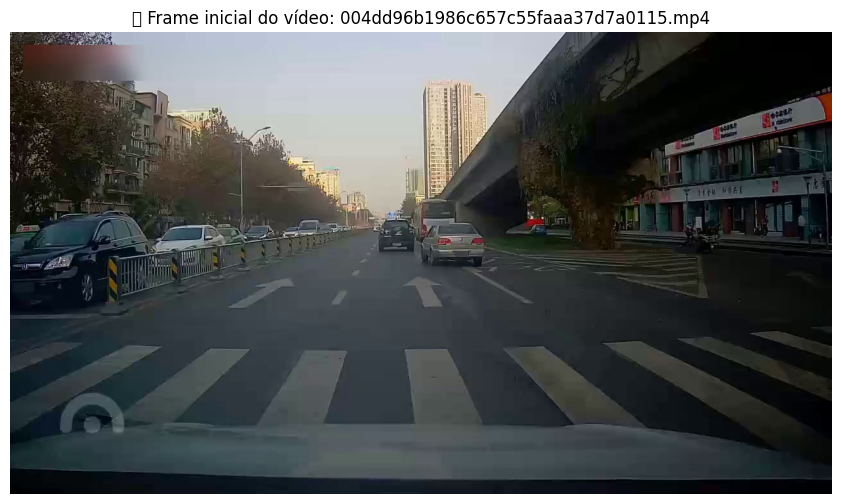

In [3]:
# 📁 Caminho para a pasta com os vídeos no Drive
video_folder = '/content/drive/MyDrive/Colab Notebooks/arquivos/1001'

# 🎥 Lista os vídeos da pasta
video_files = [f for f in os.listdir(video_folder) if f.endswith('.mp4')]
print(f"🔍 {len(video_files)} vídeos encontrados.")
print("🎞️ Exemplos:", video_files[:5])

# 🎬 Carrega o primeiro vídeo
video_path = os.path.join(video_folder, video_files[0])
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

# 🖼️ Exibe o primeiro frame
if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 6))
    plt.imshow(frame_rgb)
    plt.title(f"📌 Frame inicial do vídeo: {video_files[0]}")
    plt.axis('off')
    plt.show()
else:
    print("❌ Erro ao carregar o vídeo.")


## 📂 Etapa 1 – Conexão com Google Drive e Leitura dos Dados

Para facilitar o acesso aos vídeos do dataset **D²-City**, optamos por armazenar os arquivos em uma pasta no Google Drive, utilizando a funcionalidade nativa do Google Colab de montagem do Drive.

### ✅ O que foi feito até aqui:

- 📦 Instalamos as bibliotecas necessárias: `ultralytics`, `opencv-python`, `matplotlib`.
- 🔗 Montamos o Google Drive com o comando `drive.mount()`.
- 📁 Navegamos até a pasta:  


- 🎥 Listamos e carregamos os vídeos `.mp4` contidos nela.
- 🖼️ Extraímos e exibimos o **primeiro frame** de um dos vídeos com OpenCV e Matplotlib.

---

### 🔍 Exemplo de vídeo carregado:

- **Nome do arquivo:** `004dd96b1986c657c55faaa37d7a0115.mp4`
- **Formato:** MP4
- **Resolução:** Alta (padrão do D²-City)

---

### 🧠 Por que essa etapa é importante?

Visualizar o primeiro frame nos garante que:

- O vídeo foi carregado com sucesso;
- O caminho no Drive está correto;
- O formato do vídeo é compatível;
- A pipeline de leitura está pronta para receber o modelo de detecção.



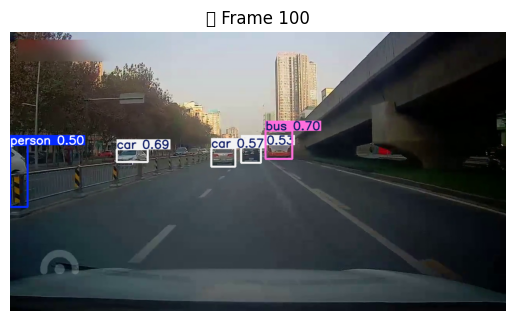

In [5]:
# ⚙️ Carrega o modelo YOLOv8 pré-treinado
model = YOLO('yolov8n.pt')

# 🛣️ Caminho do vídeo que vamos processar
video_path = os.path.join(video_folder, video_files[0])

# 🎞️ Abre o vídeo
cap = cv2.VideoCapture(video_path)

# 💡 Loop para processar os primeiros N frames
frame_count = 0
max_frames = 100

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    # 📦 Executa a detecção
    results = model.predict(source=frame, conf=0.4, verbose=False)

    # 🖍️ Pega a imagem anotada com bounding boxes
    annotated_frame = results[0].plot()

    # 🖼️ Converte para RGB e mostra o frame
    annotated_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    plt.imshow(annotated_rgb)
    plt.axis('off')
    plt.title(f"🧠 Frame {frame_count + 1}")
    display(plt.gcf())
    clear_output(wait=True)

    frame_count += 1
    time.sleep(0.05)

cap.release()
plt.close()


## 🚀 Etapa 2 – Construção do App em Streamlit com Alerta de Colisão

Após validar o funcionamento do modelo **YOLOv8 pré-treinado** em vídeos do dataset **D²-City**, avançamos agora para a **fase de aplicação prática**: a construção de um sistema interativo que simula um **módulo de prevenção de colisão veicular**, estilo Tesla Vision.

---

### 🎯 Objetivo

Desenvolver uma aplicação com **Streamlit** que:
- Permite ao usuário enviar um vídeo de dashcam;
- Processa cada frame usando o modelo YOLOv8 para detectar objetos;
- Estima riscos de colisão com base no tamanho (área) da bounding box;
- Emite **alertas visuais** quando objetos se aproximam demais do carro;
- Mostra o vídeo processado com as detecções em tempo real na interface.

---

### 🧠 Justificativa

Essa etapa simula uma aplicação **em tempo real**, focada em segurança automotiva:
- Não exige sensores físicos, operando apenas com **visão monocular**;
- Representa um protótipo funcional de um sistema de visão embarcada;
- Torna o projeto aplicável em contextos como **monitoramento**, **ADAS** e **condução autônoma**.

---

### 🧰 Tecnologias usadas

- `YOLOv8` – Detecção de objetos em tempo real
- `OpenCV` – Processamento e exibição de vídeo
- `Streamlit` – Interface web interativa
- `Python` – Lógica de fluxo e visualização
- `Ultralytics` – Framework de inferência do YOLOv8

---

### 📦 Próximos arquivos do projeto

- `app.py` → Arquivo principal com a interface do Streamlit
- `requirements.txt` → Dependências para rodar localmenten

